## OUTLIER HANDLER

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, SVMSMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression, HuberRegressor, RANSACRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree,DecisionTreeClassifier,export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score, r2_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv(r"C:\Users\PC\Downloads\ML\ML\diamonds.csv")

In [11]:
df

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789
...,...,...,...,...,...,...,...,...
49995,49996,0.71,Ideal,5,H,VVS1,7,2918
49996,49997,0.43,Ideal,5,G,VVS2,6,1056
49997,49998,1.14,Premium,4,G,VS2,5,6619
49998,49999,1.01,Premium,4,E,VS2,5,6787


In [4]:
df.describe()

,Unnamed: 0,carat,cut_ord,clarity_ord,price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,0.798597,3.903980,4.126700,3939.103500
std,14433.901067,0.474651,1.117043,1.665564,3995.879832
min,1.000000,0.200000,1.000000,1.000000,326.000000
25%,12500.750000,0.400000,3.000000,3.000000,948.000000
50%,25000.500000,0.700000,4.000000,4.000000,2402.500000
75%,37500.250000,1.040000,5.000000,5.000000,5331.000000
max,50000.000000,5.010000,5.000000,8.000000,18823.000000


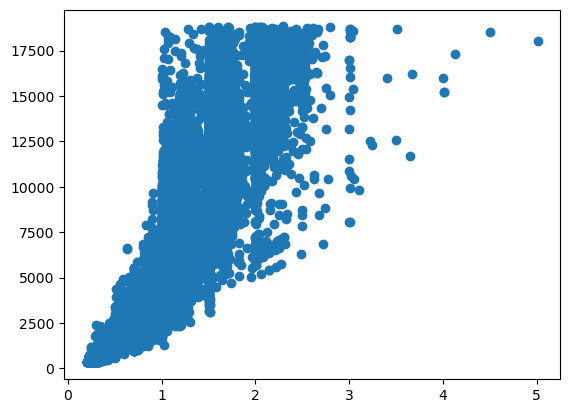

In [5]:
plt.scatter(df["carat"],df["price"])

<Axes: ylabel='carat'>

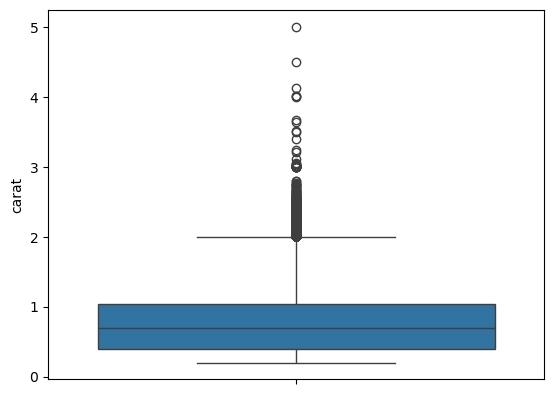

In [6]:
sns.boxplot(df["carat"])

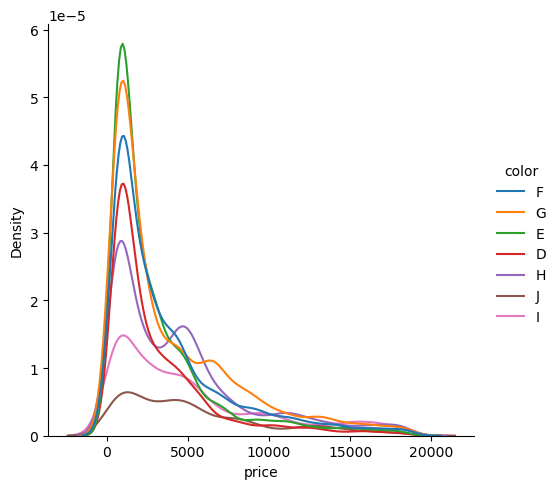

In [7]:
sns.displot(data  = df, x = df["price"], hue= "color", kind = "kde")

In [12]:
X = df.iloc[:, [1,3,6]]
y = df.price

In [13]:
X

,carat,cut_ord,clarity_ord
0,0.51,4,4
1,2.25,1,1
2,0.70,3,5
3,0.47,2,4
4,0.30,5,7
...,...,...,...
49995,0.71,5,7
49996,0.43,5,6
49997,1.14,4,5
49998,1.01,4,5


In [10]:
# def = 0
# ghij = 1

In [11]:
def encode_color(c):
    if (c in "DEF"):
        return 0
    elif (c in"GHIJ"):
        return 1
    else:
        return -1

In [12]:
df["color"] = df["color"].apply(encode_color)

In [13]:
df["color"]

0        0
1        1
2        0
3        0
4        1
        ..
49995    1
49996    1
49997    1
49998    0
49999    1
Name: color, Length: 50000, dtype: int64

In [14]:
df

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,0,VS1,4,1749
1,2,2.25,Fair,1,1,I1,1,7069
2,3,0.70,Very Good,3,0,VS2,5,2757
3,4,0.47,Good,2,0,VS1,4,1243
4,5,0.30,Ideal,5,1,VVS1,7,789
...,...,...,...,...,...,...,...,...
49995,49996,0.71,Ideal,5,1,VVS1,7,2918
49996,49997,0.43,Ideal,5,1,VVS2,6,1056
49997,49998,1.14,Premium,4,1,VS2,5,6619
49998,49999,1.01,Premium,4,0,VS2,5,6787


In [9]:
lr = LinearRegression()

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y_trans, test_size = 0.25, random_state = 2)

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
lr.score(X_test,y_test)

0.8864233038745791

In [21]:
y_trans = np.log(y)

<Axes: ylabel='price'>

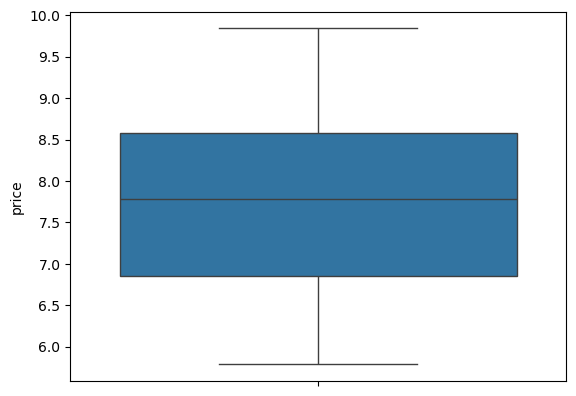

In [23]:
sns.boxplot(y_train)

<Axes: xlabel='carat'>

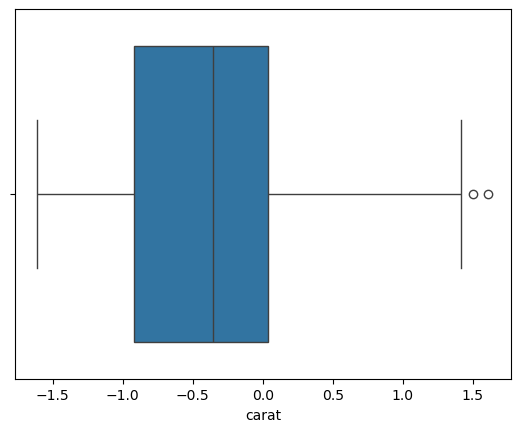

In [18]:
sns.boxplot(data=X,x="carat")

In [17]:
X = np.log(X)

In [14]:
y_train_trans = np.log(y_train)

In [15]:
lr.fit(X_train,y_train_trans)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)

In [17]:
y_pred

array([ 8.36435596,  7.82207442, 10.17484845, ...,  8.6000051 ,
        8.26966592,  7.20766511])

In [25]:
r2_score(y_test,np.exp(y_pred))

-6.225372717947507

In [15]:
np.exp(y_pred)

array([ 4291.34705673,  2495.07588246, 26234.96771177, ...,
        5431.68729953,  3903.64463767,  1349.73709431])

In [18]:
X_train["carat"] = np.log(X_train["carat"])
X_test["carat"] = np.log(X_test["carat"])


In [19]:
X_test

,carat,cut_ord,clarity_ord
23656,0.086178,3,4
27442,-0.223144,2,5
40162,0.708036,4,2
8459,-1.139434,3,5
8051,-0.248461,4,5
...,...,...,...
11715,0.425268,5,5
33646,-0.867501,5,7
11304,0.148420,4,5
35365,0.000000,4,5


In [20]:
lr.fit(X_train,y_train_trans)

LinearRegression()

In [21]:
lr.predict(X_test)

array([8.60924704, 8.12633873, 9.54793873, ..., 8.86087697, 8.59376107,
       7.15738324])

In [22]:
lr.score(X_test,y_test)

-0.9659317511351313

In [97]:
X.isnull().sum()

carat          0
cut_ord        0
clarity_ord    0
dtype: int64

In [98]:
y

0        1749
1        7069
2        2757
3        1243
4         789
         ... 
49995    2918
49996    1056
49997    6619
49998    6787
49999    9428
Name: price, Length: 50000, dtype: int64

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 2)

In [18]:
X_train

,carat,cut_ord,clarity_ord
45019,-1.108663,4,4
2991,-1.171183,5,8
5805,0.058269,4,3
30941,0.019803,3,2
37113,-1.139434,5,5
...,...,...,...
44566,0.067659,5,2
30280,-1.139434,3,3
6637,-0.994252,4,3
35343,-0.693147,4,5


In [23]:
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test)
y_pred

array([6789.47537455, 5102.72782517, 9997.59445296, ..., 7856.65526267,
       6905.19311819, 2163.9607323 ])

In [25]:
lr.score(X_test,y_test)

0.7712431013387303

In [105]:
y_train

45019     854
2991      891
5805     5236
30941    3947
37113     846
         ... 
44566    5077
30280     421
6637      616
35343    1559
23720    1656
Name: price, Length: 37500, dtype: int64

In [53]:
q1 = X_train["carat"].quantile(0.25)
q3 = X_train["carat"].quantile(0.75)

iqr = q3 - q1
ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr


In [54]:
X_train.loc[ X_train["carat"] < ll, "carat"] = ll
X_train.loc[ X_train["carat"] > ul, "carat"] = ul

In [55]:
X_test.loc[ X_test["carat"] < ll, "carat"] = ll
X_test.loc[ X_test["carat"] > ul, "carat"] = ul

In [56]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8882949172744026

huber regressor
ransack regressor

## HUBER REGRESSOR

In [3]:
df = pd.read_csv(r"C:\Users\PC\Downloads\ML\ML\diamonds.csv")

In [4]:
df

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789
...,...,...,...,...,...,...,...,...
49995,49996,0.71,Ideal,5,H,VVS1,7,2918
49996,49997,0.43,Ideal,5,G,VVS2,6,1056
49997,49998,1.14,Premium,4,G,VS2,5,6619
49998,49999,1.01,Premium,4,E,VS2,5,6787


In [5]:
X = df.iloc[:, [1,3,6]]
y = df.price

In [6]:
hu = HuberRegressor()

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 2)

In [8]:
hu.fit(X_train,y_train)

HuberRegressor()

In [67]:
y_pred = lr.predict(X_test)

In [68]:
lr.score(X_test,y_test)

0.8747268654082816

## RANSACK REGRESSOR

In [70]:
ra = RANSACRegressor()

In [72]:
ra.fit(X_train,y_train)

RANSACRegressor()

In [73]:
y_pred = lr.predict(X_test)

In [75]:
ra.score(X_test,y_test)

0.8373913926170422

## HANDLING IMBALANCE

In [4]:
df = pd.read_csv(r"C:\Users\PC\Downloads\ML\ML\Liver_disease.csv")

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
df["Liver_Problem"].value_counts()

Liver_Problem
1    350
2    150
Name: count, dtype: int64

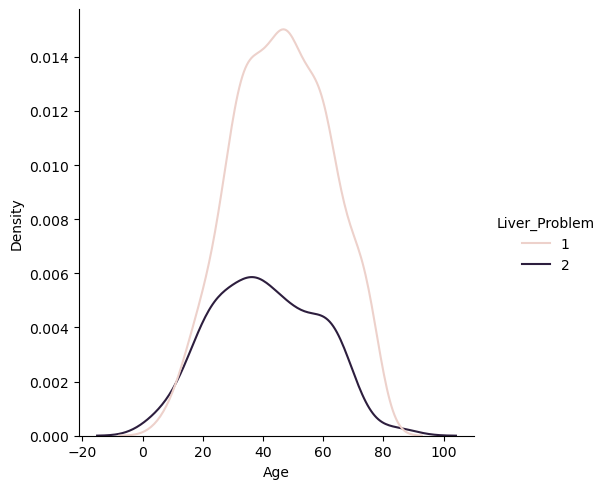

In [11]:

sns.displot(df, x= "Age", hue ="Liver_Problem", kind="kde")

In [10]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Problem                 0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

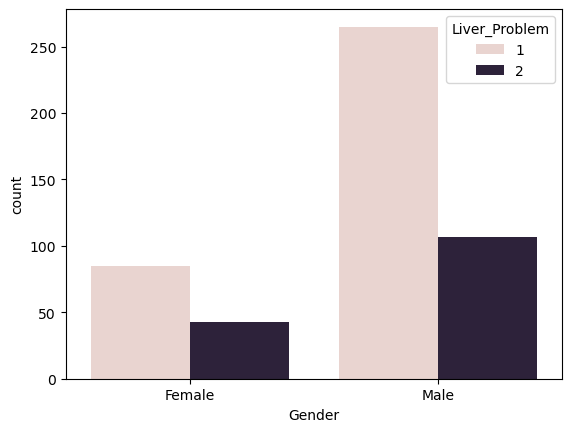

In [13]:
sns.countplot(df, x = "Gender", hue="Liver_Problem")

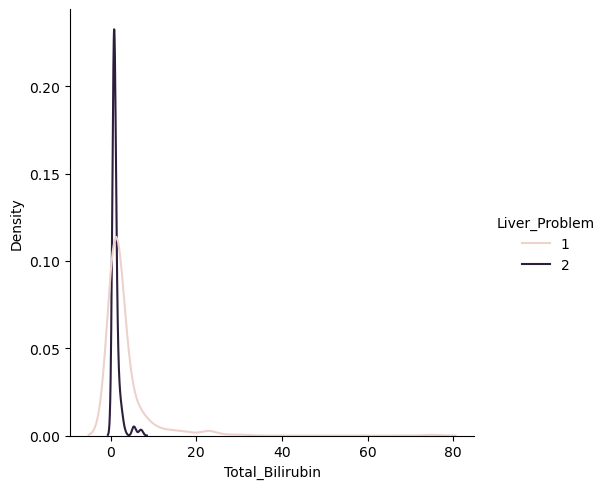

In [18]:
sns.displot(df, x= "Total_Bilirubin", hue ="Liver_Problem", kind="kde")

In [16]:
df.corr(numeric_only = True)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
Age,1.000000,0.057387,0.066546,0.087363,-0.095215,-0.027219,-0.219490,-0.274713,-0.202507,-0.150588
Total_Bilirubin,0.057387,1.000000,0.781711,0.268049,0.273827,0.248864,-0.056948,-0.188618,-0.241890,-0.183162
Direct_Bilirubin,0.066546,0.781711,1.000000,0.345133,0.336719,0.305176,-0.052779,-0.204776,-0.271533,-0.223604
Alkaline_Phosphotase,0.087363,0.268049,0.345133,1.000000,0.123885,0.168421,-0.034374,-0.177984,-0.280934,-0.192232
Alamine_Aminotransferase,-0.095215,0.273827,0.336719,0.123885,1.000000,0.793521,-0.038924,-0.025469,0.006784,-0.163415
Aspartate_Aminotransferase,-0.027219,0.248864,0.305176,0.168421,0.793521,1.000000,-0.029802,-0.071393,-0.062038,-0.143285
Total_Protiens,-0.219490,-0.056948,-0.052779,-0.034374,-0.038924,-0.029802,1.000000,0.832103,0.297391,0.029205
Albumin,-0.274713,-0.188618,-0.204776,-0.177984,-0.025469,-0.071393,0.832103,1.000000,0.740581,0.140282
Albumin_and_Globulin_Ratio,-0.202507,-0.241890,-0.271533,-0.280934,0.006784,-0.062038,0.297391,0.740581,1.000000,0.179792
Liver_Problem,-0.150588,-0.183162,-0.223604,-0.192232,-0.163415,-0.143285,0.029205,0.140282,0.179792,1.000000


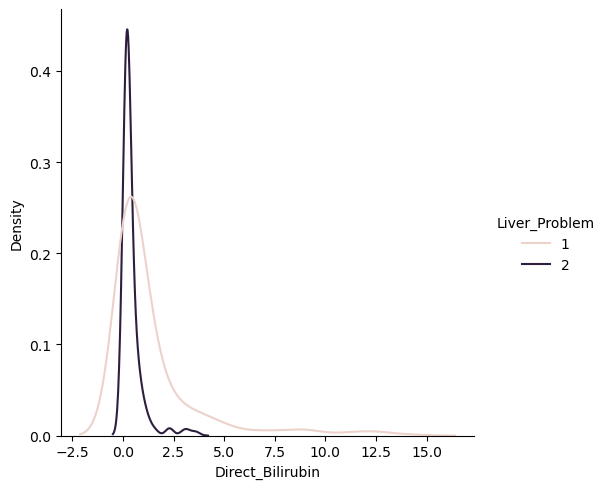

In [17]:
sns.displot(df, x= "Direct_Bilirubin", hue ="Liver_Problem", kind="kde")

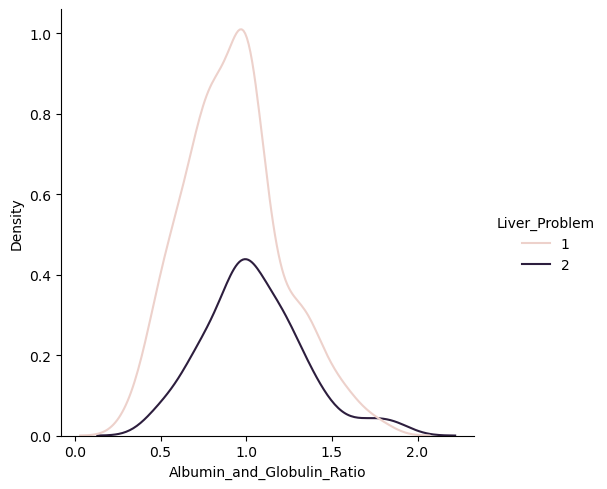

In [20]:
sns.displot(df, x= "Albumin_and_Globulin_Ratio", hue ="Liver_Problem", kind="kde")

In [24]:
X = df[["Total_Protiens","Total_Bilirubin","Aspartate_Aminotransferase"]]
X
y  = df["Liver_Problem"]

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.15, random_state = 41, stratify = y)

In [27]:
y_train.value_counts()

Liver_Problem
1    297
2    128
Name: count, dtype: int64

In [34]:
lr = LogisticRegression(random_state = 21)
lr = lr.fit(X_train,y_train)

In [35]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [36]:
lr.score(X_test,y_test)

0.7066666666666667

In [38]:
confusion_matrix(y_test, y_pred)

array([[53,  0],
       [22,  0]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        53
           2       0.00      0.00      0.00        22

    accuracy                           0.71        75
   macro avg       0.35      0.50      0.41        75
weighted avg       0.50      0.71      0.59        75



## HADLING IMBALANCE USING CLASS WEIGHT

In [43]:
lr = LogisticRegression(random_state = 21, class_weight = "balanced")
lr = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred

array([2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

In [44]:
lr.score(X_test,y_test)

0.44

In [45]:
confusion_matrix(y_test, y_pred)

array([[20, 33],
       [ 9, 13]], dtype=int64)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.38      0.49        53
           2       0.28      0.59      0.38        22

    accuracy                           0.44        75
   macro avg       0.49      0.48      0.44        75
weighted avg       0.57      0.44      0.46        75



## HANDLING IMBALANCE USING UP AND DOWNSAMPLING

In [47]:
X_train

,Total_Protiens,Total_Bilirubin,Aspartate_Aminotransferase
167,5.6,3.0,67
300,8.2,0.8,25
153,6.5,0.6,27
406,6.7,0.7,58
171,6.6,1.9,602
...,...,...,...
36,7.2,0.7,36
376,7.0,0.7,33
120,7.1,23.0,275
210,4.1,0.8,14


In [61]:
sampler = SMOTE(sampling_strategy = 0.7, random_state = 2)

In [62]:
X_rersampled,y_resampled = sampler.fit_resample(X_train,y_train)

In [63]:
y_resampled.value_counts()

Liver_Problem
1    297
2    207
Name: count, dtype: int64

In [64]:
lr = LogisticRegression(random_state = 21)

In [65]:
lr.fit(X_rersampled,y_resampled)

LogisticRegression(random_state=21)

In [66]:
y_pred = lr.predict(X_test)
y_pred

array([2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 2], dtype=int64)

In [67]:
lr.score(X_test,y_test)

0.56

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.57      0.65        53
           2       0.34      0.55      0.42        22

    accuracy                           0.56        75
   macro avg       0.55      0.56      0.53        75
weighted avg       0.63      0.56      0.58        75



In [69]:
confusion_matrix(y_test, y_pred)

array([[30, 23],
       [10, 12]], dtype=int64)

## USING SVMSMOTE

In [71]:
sampler = SVMSMOTE(sampling_strategy = 0.7, random_state = 2)

In [72]:
X_rersampled,y_resampled = sampler.fit_resample(X_train,y_train)

In [73]:
y_resampled.value_counts()

Liver_Problem
1    297
2    207
Name: count, dtype: int64

In [74]:
lr = LogisticRegression(random_state = 21)

In [75]:
lr.fit(X_rersampled,y_resampled)

LogisticRegression(random_state=21)

In [76]:
y_pred = lr.predict(X_test)
y_pred

array([2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 2], dtype=int64)

In [77]:
lr.score(X_test,y_test)

0.5333333333333333

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.72      0.55      0.62        53
           2       0.31      0.50      0.39        22

    accuracy                           0.53        75
   macro avg       0.52      0.52      0.50        75
weighted avg       0.60      0.53      0.55        75



## COMBINING BOTH UP AND DOWN SAMPLING

In [87]:
sampler = SMOTEENN(sampling_strategy = 0.7, random_state = 2)

In [88]:
X_rersampled,y_resampled = sampler.fit_resample(X_train,y_train)

In [89]:
y_resampled.value_counts()

Liver_Problem
1    106
2     69
Name: count, dtype: int64

In [90]:
lr.fit(X_rersampled,y_resampled)

LogisticRegression(random_state=21)

In [91]:
y_pred = lr.predict(X_test)
y_pred

array([2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

In [92]:
lr.score(X_test,y_test)

0.5066666666666667

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.72      0.49      0.58        53
           2       0.31      0.55      0.39        22

    accuracy                           0.51        75
   macro avg       0.51      0.52      0.49        75
weighted avg       0.60      0.51      0.53        75



## STACKING OF RESAMPLED DATASET

In [94]:
X_train["Liver_Problem"] = y_train
X_train

,Total_Protiens,Total_Bilirubin,Aspartate_Aminotransferase,Liver_Problem
167,5.6,3.0,67,1
300,8.2,0.8,25,2
153,6.5,0.6,27,2
406,6.7,0.7,58,2
171,6.6,1.9,602,1
...,...,...,...,...
36,7.2,0.7,36,2
376,7.0,0.7,33,1
120,7.1,23.0,275,1
210,4.1,0.8,14,1


In [96]:
majority  = X_train[X_train["Liver_Problem"] == 1]
minority  = X_train[X_train["Liver_Problem"] == 2]

In [97]:
majority.shape

(297, 4)

In [98]:
minority.shape

(128, 4)

In [104]:
chk1 = majority.iloc[:120, :]
chk2 = majority.iloc[100:220, :]
chk3 = majority.iloc[177:, :]


In [105]:
chk1

,Total_Protiens,Total_Bilirubin,Aspartate_Aminotransferase,Liver_Problem
167,5.6,3.0,67,1
171,6.6,1.9,602,1
302,6.8,1.7,32,1
375,6.8,3.5,31,1
174,6.0,0.6,34,1
...,...,...,...,...
463,8.0,0.8,42,1
142,5.6,1.6,139,1
2,7.0,7.3,68,1
51,6.6,0.6,19,1


In [106]:
chk1 = pd.concat([chk1,minority], axis = 0)
chk2 = pd.concat([chk2,minority], axis = 0)
chk3 = pd.concat([chk3,minority], axis = 0)


In [108]:
chk3.shape

(248, 4)

In [109]:
X1 = chk1.drop("Liver_Problem", axis = 1)
y1 = chk1["Liver_Problem"]

In [110]:
lr.fit(X1,y1)
y_pred1 = lr.predict(X_test)

In [111]:
X2 = chk2.drop("Liver_Problem", axis = 1)
y2 = chk2["Liver_Problem"]
lr.fit(X2,y2)
y_pred2 = lr.predict(X_test)

In [112]:
X3 = chk3.drop("Liver_Problem", axis = 1)
y3 = chk3["Liver_Problem"]
lr.fit(X3,y3)
y_pred3 = lr.predict(X_test)

In [113]:
predictions = pd.DataFrame(data = [y_pred1,y_pred2,y_pred3]).T
predictions.columns = ["y_pred1","y_pred2","y_pred3"]
predictions

,y_pred1,y_pred2,y_pred3
0,2,2,2
1,1,1,1
2,1,1,2
3,2,2,2
4,2,2,2
...,...,...,...
70,2,2,2
71,1,1,1
72,2,2,2
73,2,2,2


In [117]:
predictions["final_pred"] = predictions.mode(axis = 1)
predictions

,y_pred1,y_pred2,y_pred3,final_pred
0,2,2,2,2
1,1,1,1,1
2,1,1,2,1
3,2,2,2,2
4,2,2,2,2
...,...,...,...,...
70,2,2,2,2
71,1,1,1,1
72,2,2,2,2
73,2,2,2,2


In [118]:
print(classification_report(y_test, predictions["final_pred"]))

              precision    recall  f1-score   support

           1       0.74      0.38      0.50        53
           2       0.31      0.68      0.43        22

    accuracy                           0.47        75
   macro avg       0.53      0.53      0.46        75
weighted avg       0.62      0.47      0.48        75



In [122]:
accuracy_score(y_test, y_pred)

0.5066666666666667

## ENSEMBLING TECHNIQUES

In [125]:
df = pd.read_csv(r"C:\Users\PC\Downloads\kyphosis.csv")

In [126]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [128]:
X = df.drop("Kyphosis",  axis = 1)
y = df["Kyphosis"]

In [131]:
le = LabelEncoder()

In [133]:
y = le.fit_transform(y)
y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state = 2, stratify = y)

In [144]:
vc = VotingClassifier(estimators = [("logistic", lr), ("tree", dtc), ("neighbors", knn)])

In [142]:
lr = LogisticRegression(random_state = 1)
dtc = DecisionTreeClassifier(random_state = 1, max_depth = 5)
knn = KNeighborsClassifier()

In [145]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(random_state=1)),
                             ('tree',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=1)),
                             ('neighbors', KNeighborsClassifier())])

In [146]:
vc.score(X_test,y_test)

0.8888888888888888

In [164]:
vc.named_estimators

{'logistic': LogisticRegression(random_state=1),
 'tree': DecisionTreeClassifier(max_depth=5, random_state=1),
 'neighbors': KNeighborsClassifier()}

In [166]:
vc.named_estimators_["tree"].predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [167]:
vc.named_estimators_["neighbors"].score(X_test, y_test)

0.6666666666666666

In [147]:
vc.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0])

In [148]:
le.inverse_transform(vc.predict(X_test))

array(['absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent'], dtype=object)

In [154]:
rtc = RandomForestClassifier(n_estimators = 21, random_state = 1, max_depth = 5)

In [155]:
rtc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=21, random_state=1)

In [157]:
rtc.score(X_test, y_test)

0.7777777777777778

In [158]:
df["Kyphosis"].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

In [159]:
print(classification_report(y_test,rtc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.50      1.00      0.67         2

    accuracy                           0.78         9
   macro avg       0.75      0.86      0.75         9
weighted avg       0.89      0.78      0.80         9



## BAGGING CLASSIFIER

In [161]:
bc = BaggingClassifier(estimator = SVC(),
                      n_estimators = 11, random_state = 0)
bc.fit(X_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=11, random_state=0)

In [162]:
bc.score(X_test, y_test)

0.7777777777777778

In [180]:
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=10)

In [185]:
ad = AdaBoostClassifier(n_estimators=50,algorithm = "SAMME",random_state=1)

In [186]:
ad.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', random_state=1)

In [187]:
ad.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0])

In [188]:
ad.score(X_test,y_test)

0.8888888888888888

In [189]:
print(classification_report(y_test,ad.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.67      1.00      0.80         2

    accuracy                           0.89         9
   macro avg       0.83      0.93      0.86         9
weighted avg       0.93      0.89      0.90         9



In [190]:
!pip install xgboost


  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)


In [204]:
model = XGBClassifier(random_state=42)

In [205]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [206]:
model.score(X_test,y_test)

0.7777777777777778

In [216]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.50      1.00      0.67         2

    accuracy                           0.78         9
   macro avg       0.75      0.86      0.75         9
weighted avg       0.89      0.78      0.80         9



In [218]:
model = CatBoostClassifier(
    iterations=1000,  
    learning_rate=0.03,  
    depth=6,  
    loss_function='Logloss'
)

In [219]:
model.fit(X_train,y_train)

0:	learn: 0.6674026	total: 77.6ms	remaining: 1m 17s
1:	learn: 0.6469001	total: 80.8ms	remaining: 40.3s
2:	learn: 0.6254298	total: 83.6ms	remaining: 27.8s
3:	learn: 0.6047643	total: 86.3ms	remaining: 21.5s
4:	learn: 0.5886963	total: 89ms	remaining: 17.7s
5:	learn: 0.5720245	total: 92.2ms	remaining: 15.3s
6:	learn: 0.5605732	total: 95.2ms	remaining: 13.5s
7:	learn: 0.5441607	total: 98.1ms	remaining: 12.2s
8:	learn: 0.5271156	total: 101ms	remaining: 11.1s
9:	learn: 0.5091685	total: 104ms	remaining: 10.3s
10:	learn: 0.4960291	total: 106ms	remaining: 9.56s
11:	learn: 0.4839885	total: 109ms	remaining: 9.01s
12:	learn: 0.4681492	total: 112ms	remaining: 8.52s
13:	learn: 0.4565746	total: 115ms	remaining: 8.08s
14:	learn: 0.4426334	total: 118ms	remaining: 7.73s
15:	learn: 0.4340861	total: 121ms	remaining: 7.43s
16:	learn: 0.4235159	total: 124ms	remaining: 7.17s
17:	learn: 0.4133045	total: 127ms	remaining: 6.91s
18:	learn: 0.4050451	total: 129ms	remaining: 6.65s
19:	learn: 0.3945524	total: 132ms	

In [220]:
model.predict(X_test)

array([0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [221]:
model.score(X_test,y_test)

0.6666666666666666

In [222]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.33      0.50      0.40         2

    accuracy                           0.67         9
   macro avg       0.58      0.61      0.58         9
weighted avg       0.72      0.67      0.69         9

